# Introducing the problem & the dataset: 


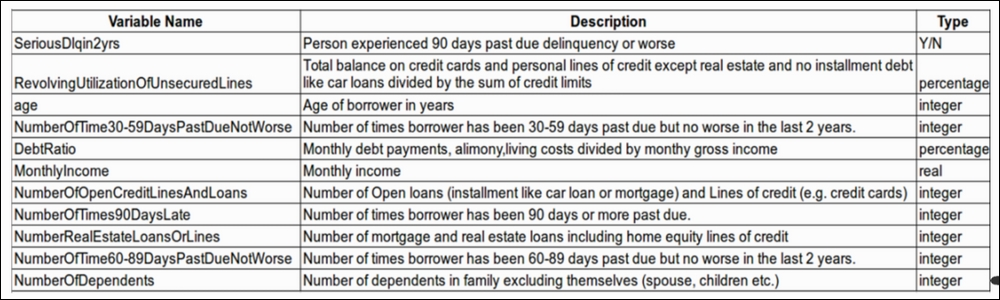






I will start off by reading the dataset provided at Kaggle: https://www.kaggle.com/c/GiveMeSomeCredit 
This is my first "real world dataset" practice project

I choose this data for a couple of reasons: 

1. There are missing values
2. There are a lot of outlier & incorrect values 
3. It is a simple supervised classification application as we are predicting Yes or No for SeriousDlqin2yrs 
4. It is a good dataset to get your hands dirty & apply what I have learned in DataCamp & MOOCs

I have structured this notebook in an organized way so it is easy to understand and for someone to follow along. 

# Reading the data: 

By using the .head() method on the dataframe (df) we can see that there is an unnamed column that gives us no information. 

We also observe that the names of the columns are somewhat long and have special characters in them. 

__Our strategy is to drop the unnamed column, lower-case & remove all special characters from the column names.__ 

I will not change the column names however. 

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\1234567890\Desktop\python projects\cred risk modelling\credit-risk-modelling-master\data\cs-training.csv")
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [2]:
import re  # import regular expression library 

df = df.drop(df.columns[[0]], axis=1) # drop the first unnamed column
df.columns = map(str.lower, df.columns) # lower case all columns using str.lower on df.columns

    
# Remove punctuation from all columns 

_col = []
for col in df.columns:
    col = re.sub(r'[^\w\s]','',col)
    _col.append(col)
    
df.columns = _col
df.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Exploratory Data Analysis (EDA): 


We will so some EDA. 
The reason we want to do this is because we want to identify anamolies & incorrect values. 
We would like to get a general idea of our data set. 
Spending time here is important as data pre-processing is the most important part of any data anaylsis. 
We will explore details & attributes about the data, devise strategies, take mental notes on how we would like to over come problems with the data if there are any. 



# Initial thoughts: 

We will explore each variable 1 by 1: 
I want to lay special emphasis on mean, median, max, & min values. A data scientist should have great intuition about these values. If something seems off, they must explore the variable. 

I will go into more detail but just for an example I would like to point out a simple case. 

If we observe the __age__ variable we see the minimum value is 0. It is clear that no one with an age of 0 will apply for a loan. 

_Try spotting some for yourself & see if you can catch any!_



In [3]:
df.describe()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


We will then move on by exploring each variable one by one. Let's start with our target variable. 

We can see from the above __describe()__ method that the min & max values above for our target variable are  between 1 & 0, which seems about right.

So we will move forward & check for class imbalance, just to get an idea of how many people got rejected. 


Text(0,0.5,'Total Count')

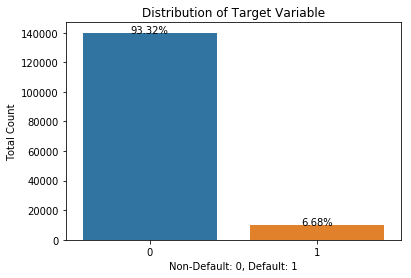

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

total = float(len(df))  

ax = sns.countplot(x="seriousdlqin2yrs", data=df) # initialize a countplot 
for p in ax.patches:   #  display the percentages on the data we use this block of code
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}%'.format(height/total*100),  
            ha="center") 
    
ax.set_title("Distribution of Target Variable")
ax.set_xlabel('Non-Default: 0, Default: 1')
ax.set_ylabel('Total Count')

From the above count plot we can see that there _does_ exist a class imbalance problem. We have more data for 0 than we have for 1. We should take a note of this & revisit it later if neccessary. We should consider ahead to think of algorithms that are resistant class imbalance problem

I will not go into more visualizations for other variables. That will happen during data-preprocessing as we will explore every single variable. 

# Data Preprocessing

## Missing Values

The first step in data preprocessing is to look for missing data: 

We will start off by checking for missing values. 

Using __.isnull.sum()__ we can quickly check for a summary. 

There are 29731 missing values for monthly income & 3924 missisng values for number of dependents. 

We will use the simplest amuptation technique: 

1. mean replace
2. median replace

In [4]:
df.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

## Replacement Method for Missing Values

We will create 2 data sets:

df1 =  mean replaced

df2 = median replaced

Every outlier or incorrect value operation that I do from here onwards will be on both datasets. In the end when we are training our model we would like to compare results for both & check which one is better for our model

In [5]:
df1 = df.fillna(df.mean())
df1.isnull().sum()


seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

In [6]:
df2 = df.fillna(df.median())
df2.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

## Incorrect values or "outliers": 

Now that we have missing values out of the way we would like to check for incorrect entries or in more statistical terms outliers. Let's start by looking at mean and median for the entire set. 
 

## revolvingutilizationofunsecuredlines 


__Definition__: Revolving utilization, also known as your “debt-to-limit ratio” or “credit utilization,” measures the amount of your revolving credit limits that you are currently using. Your revolving utilization is an important part of your credit score. 

__Example of individual utilization:__ 


Say I have a credit card with a 5,000  credit limit and a 1,000 balance. I divide 1,000 by 5,000 and get 0.2. I then multiply 0.2 by 100 to arrive at 20%. My individual revolving utilization is 20% for that account

As balance cannot be more than the credit card limit. You cannot take more money out than your credit limit at a given time. 

If you took out all the money that your credit limit had: then your revolving utilization would be 1. 
IF you took no money out: your revolving utilization would be 0 

The normal range for this variable is between 0 and 1. Therefore we will start off by first replacing everthing in our __revolvingutilizationofunsecuredlines__ variable greater than 1 to be the max which is 1

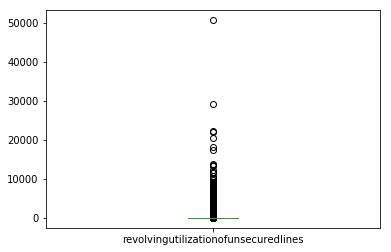

In [96]:
df.revolvingutilizationofunsecuredlines.plot.box()

In [12]:
replace = []

for value in df1.revolvingutilizationofunsecuredlines:
    if value > 1:
        replace.append(1)
    else:
        replace.append(value)
df1.revolvingutilizationofunsecuredlines = replace

max(df1.revolvingutilizationofunsecuredlines)



replace = []

for value in df2.revolvingutilizationofunsecuredlines:
    if value > 1:
        replace.append(1)
    else:
        replace.append(value)
df2.revolvingutilizationofunsecuredlines = replace

max(df2.revolvingutilizationofunsecuredlines)

1.0

Note: I have replaced the outliers in both datasets. df1 = mean replaced, df = median replaced

## age

Let's look at the age variable. We will import collections package & create a box plot 

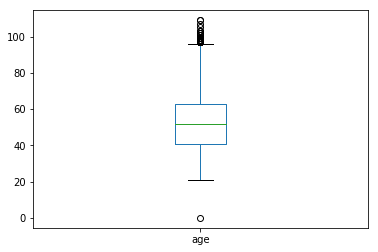

In [97]:
import collections

df.age.plot.box()


In [14]:
collections.Counter(df.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

From the above box plot & the collection counter it is evident that we have few "outliers". I will not replace the ones with age greater than 95 although these ages make a small percentage of the overall data we will keep them in the dataset for now. However we will replace age 0 with minimum age 

In [15]:
replace = []
for value in df1.age:
    if value < 21:
        replace.append(21)
    else:
        replace.append(value)
df1.age = replace

replace = []

for value in df2.age:
    if value < 21:
        replace.append(21)
    else:
        replace.append(value)
df2.age = replace


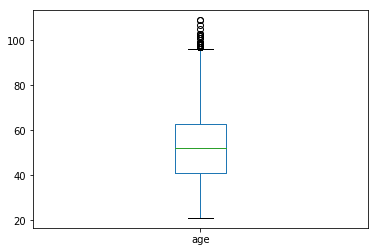

In [16]:
df1.age.plot.box()

We can see from the above box plot that there is no age 0 left anymore

## numberoftime3059dayspastduenotworse, numberoftimes90dayslate, numberoftime6089dayspastduenotworse

These 3 variables are essentially the same. We can either drop 2 and keep one or keep all three. I will keep all three for now. 

One important thing to notice is that there are a two values 98 & 96 that show up in all there variables. For the sake of simplicity we will drop them. 

They are only 269 total values (for 98 & 96), dropping them would not effect our model adversely as we will not be losing critical information

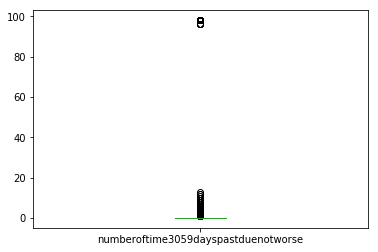

In [17]:
df.numberoftime3059dayspastduenotworse.plot.box()

In [18]:
collections.Counter(df.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [19]:
collections.Counter(df.numberoftimes90dayslate)

Counter({0: 141662,
         1: 5243,
         3: 667,
         2: 1555,
         5: 131,
         4: 291,
         98: 264,
         10: 8,
         9: 19,
         6: 80,
         7: 38,
         8: 21,
         15: 2,
         96: 5,
         11: 5,
         13: 4,
         14: 2,
         17: 1,
         12: 2})

In [20]:
collections.Counter(df.numberoftime6089dayspastduenotworse)

Counter({0: 142396,
         1: 5731,
         2: 1118,
         5: 34,
         3: 318,
         98: 264,
         4: 105,
         6: 16,
         7: 9,
         8: 2,
         96: 5,
         11: 1,
         9: 1})

In [21]:
df1 = df1[df1.numberoftime3059dayspastduenotworse != 98]
df1 = df1[df1.numberoftime3059dayspastduenotworse != 96]



df2 = df2[df2.numberoftime3059dayspastduenotworse != 98]
df2 = df2[df2.numberoftime3059dayspastduenotworse != 96]

In [22]:
collections.Counter(df1.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         12: 2,
         8: 25,
         9: 12,
         13: 1,
         11: 1})

In the code above I use __collections.Counter()__ to get counts of different values in the columns. We can see that 98 & 96 appear in all three variables. So we drop them from both datasets df1= mean replaced, df2 = median replaced 

## Outlier detection methods: 

Outliers or incorrect values were easy to identify in the variables above. We used simple techniques (which we should always use to begin with) but for the variables that come after things get a little harder. We would like to develop a more robust method to identify outliers that will guide us for good data cleaning & pre-processing. From reading articles & books online. I have come across Jalaj Thanaki method. This is my go to method. Special thanks to her!  

We define 3 outlier method functions: 

1. Percentile based method
2. Mean Absolute Deviation (MAD) based method https://en.wikipedia.org/wiki/Median_absolute_deviation
3. Standard Deviation based method

After that we define a voting function: This function takes the votes from the above three functions & outputs the one with majority votes.

All the functions described below output True or False values for the value in consideration. 

If 2 methods output True for the same value, then the voting function will be True too. 

So, if two techniques indicate that the data should be considered an outlier, then we consider that data point as an outlier; otherwise, we don't. So, the minimum number of votes we need here is two. 

In [98]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    #return minval, maxval
    return ((data < minval) | (data > maxval))

# We assume that we should consider all the data points that lie under the percentile range from 2.5 to 97.5. 
# We have derived the percentile range by deciding on a threshold of 95. 

In [25]:
def mad_based_outlier(points, threshold=3.5):
    median_y = np.median(points)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in points])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in points]
    return np.abs(modified_z_scores) > threshold

In [26]:
def std_div(data, threshold=3):
    std = data.std()
    
    isOutlier = []
    for val in data:
        if val/std > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

# we will use standard deviation and the mean value to find the outlier. Here, we select a random threshold value of 3. 

In [27]:
def outlierVote(data):
    x = percentile_based_outlier(data)
    y = mad_based_outlier(data)
    z = std_div(data)
    temp = list(zip(data.index, x, y, z))
    final = []
    for i in range(len(temp)):
        if temp[i].count(False) >= 2:
            final.append(False)
        else:
            final.append(True)
    return final

# if two techniques indicate that the data should be considered an outlier, then we consider that data point as an outlier 
# the minimum number of votes we need here is 2

In [28]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=4) # creates a figure with 4 rows
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier, std_div, outlierVote]): # assigns each row to a function using a zip object
        sns.distplot(x, ax=ax, rug=True, hist=False) # creates a distribution plot for each row of figures created above.
        outliers = x[func(x)] # applies the functions zipped above to the inputted data
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False) # plots the outliers

    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20) # label the axis 
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    axes[2].set_title('STD-based Outliers', **kwargs)
    axes[3].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,10) 

In [29]:
def outlierRatio(data):
    functions = [percentile_based_outlier, mad_based_outlier, std_div, outlierVote] 
    outlierDict = {}
    for func in functions:
        funcResult = func(data)
        count = 0
        for val in funcResult:
            if val == True:
                count += 1 
        outlierDict[str(func)[10:].split()[0]] = [count, '{:.2f}%'.format((float(count)/len(data))*100)]  #str(func)[10:].split()[0]] extracts the name of the function in a string form, the second part equls it to the total count and its %
    
    return outlierDict

# gives the count & percentage of outlier votes detected by each method.

## debtratio


Let's try these functions on debtratio

From the box plot we can see there is no single cut off for outliers. So we use our new functions to help us out

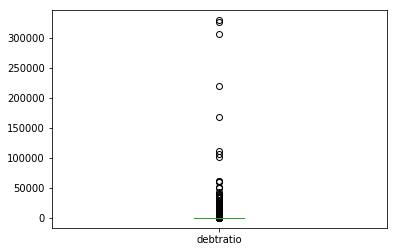

In [61]:
df.debtratio.plot.box()

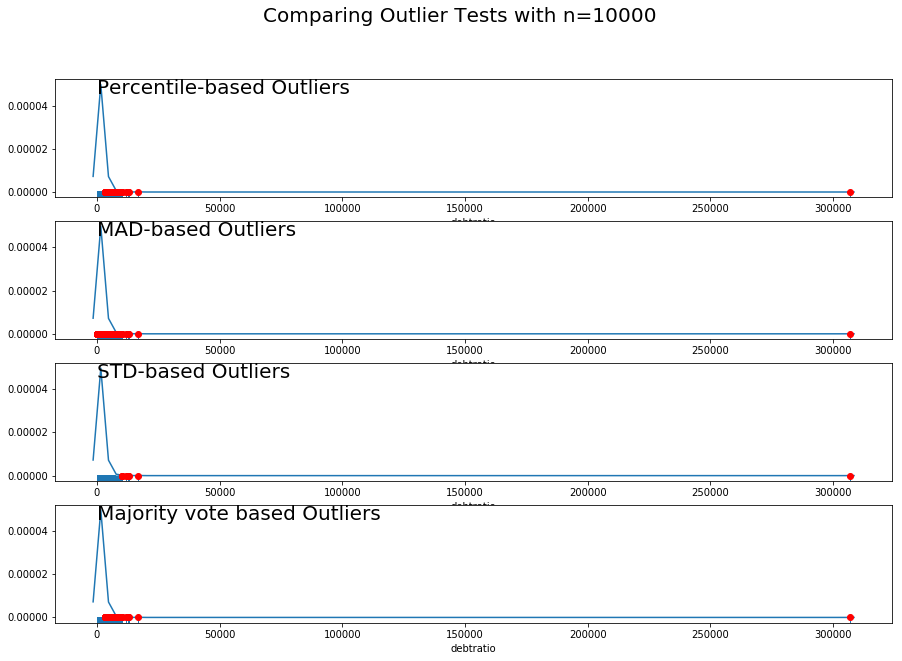

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plotOutlier(df.debtratio.sample(10000))

In [62]:
outlierRatio(df.debtratio)

{'percentile_based_outlier': [3750, '2.50%'],
 'mad_based_outlier': [31727, '21.15%'],
 'std_div': [779, '0.52%'],
 'outlierVote': [3750, '2.50%']}

From the above plots we see all the values that are red dots are outliers. They are COULD be or COULD NOT be "outliers" in real life but according to our function definitions they are. So we have to make a judgement call here. 

Because there is no clear cut-off point for debtratio outliers. And the variable seems like an important one, we don't want incorrect values in this coulmn. 

__We would use a more creative method:__

1. __We will take the function with the highest outlier range OR we could take the votingOutlier function__ 

2. __We find the range of the outliers.__
Explanation: Let's just say our function says that any value in the range, say for example, 25 to 45 is an outlier. So our range of outliers will be (25, 45)

3. We take the minimum bound from the outlier range (which in our hypothetical case is 25). We say any value above this minimum bound is our cut-off

4. Replace all values greater than our minimum bound by minimum bound


In [99]:
min_bound  = min([val for (val, out) in zip(df.debtratio, mad_based_outlier(df.debtratio)) if out == True])
#  the above line reads: consider the range of True & False. From the range of True give me the smallest number
min_bound

1.641791045

In [64]:
replace = []
for value in df1.debtratio:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df1.debtratio = replace

replace = []
for value in df2.debtratio:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df2.debtratio = replace



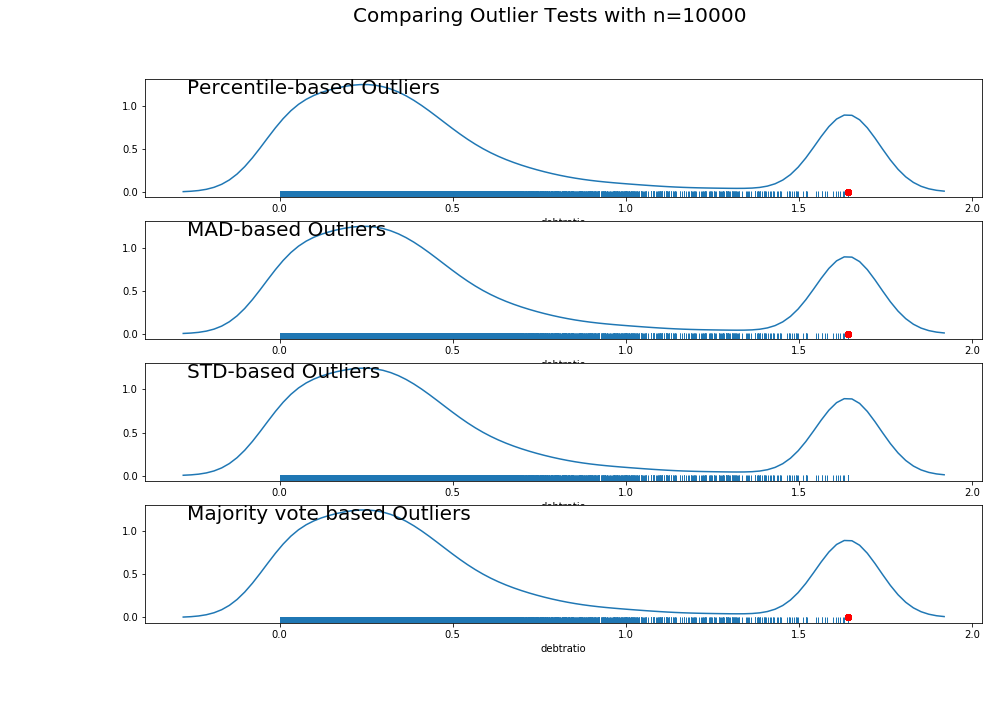

In [34]:
plotOutlier(df1.debtratio.sample(10000))

We used mad_based_outlier to find the minimum bound for our outlier range. We then replaced everything greater than the outlier range minimum bound with minimum bound

## numberofdependents

We will use __collections.Counter()__ to see our distribution quickly. Before we do that we want to convert all the numberofdependents to integers

In [35]:
df1.numberofdependents = df1.numberofdependents.astype(int)
df2.numberofdependents = df2.numberofdependents.astype(int)


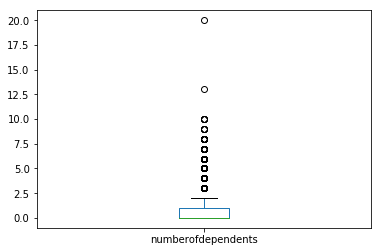

In [36]:
df.numberofdependents.plot.box()

In [37]:
dependents = df.numberofdependents.dropna()

In [38]:
collections.Counter(dependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 86902,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [39]:
replace = []
for value in df1.numberofdependents:
    if value > 10:
        replace.append(10)
    else:
        replace.append(value)
df1.numberofdependents = replace


replace = []
for value in df2.numberofdependents:
    if value > 10:
        replace.append(10)
    else:
        replace.append(value)
df2.numberofdependents = replace

From the box plot and collections.Counter we can see that the frequency of children greater 10 is unlikely so we replace these values with 10. We choose 10 as our maximum cut off

## monthlyincome

montly income is also a tricky one. We use the same minimum bound replacement method explained above but this time we will use the voting method to determine our lower bound 

In [40]:
monthly = df.monthlyincome.dropna()

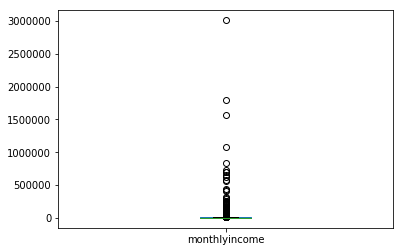

In [41]:
df.monthlyincome.plot.box()

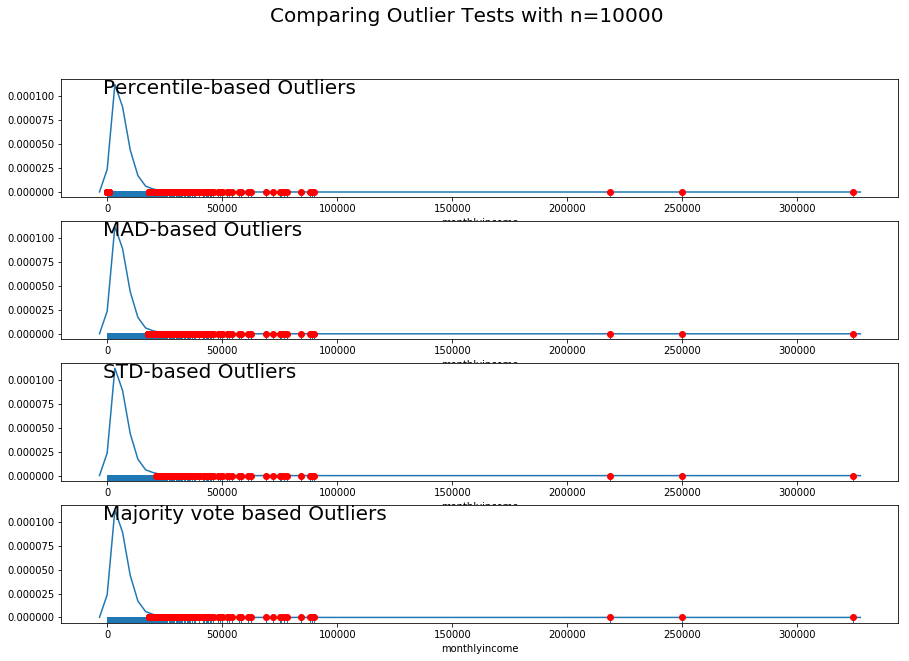

In [42]:
plotOutlier(monthly.sample(10000))

In [43]:
outlierRatio(monthly)

{'percentile_based_outlier': [5946, '4.94%'],
 'mad_based_outlier': [3403, '2.83%'],
 'std_div': [391, '0.33%'],
 'outlierVote': [2989, '2.49%']}

In [44]:
min_bound  = min([val for (val, out) in zip(monthly, outlierVote(monthly)) if out == True])
min_bound

18001.0

In [45]:
replace = []
for value in df1.monthlyincome:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df1.monthlyincome = replace

replace = []
for value in df2.monthlyincome:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df2.monthlyincome = replace

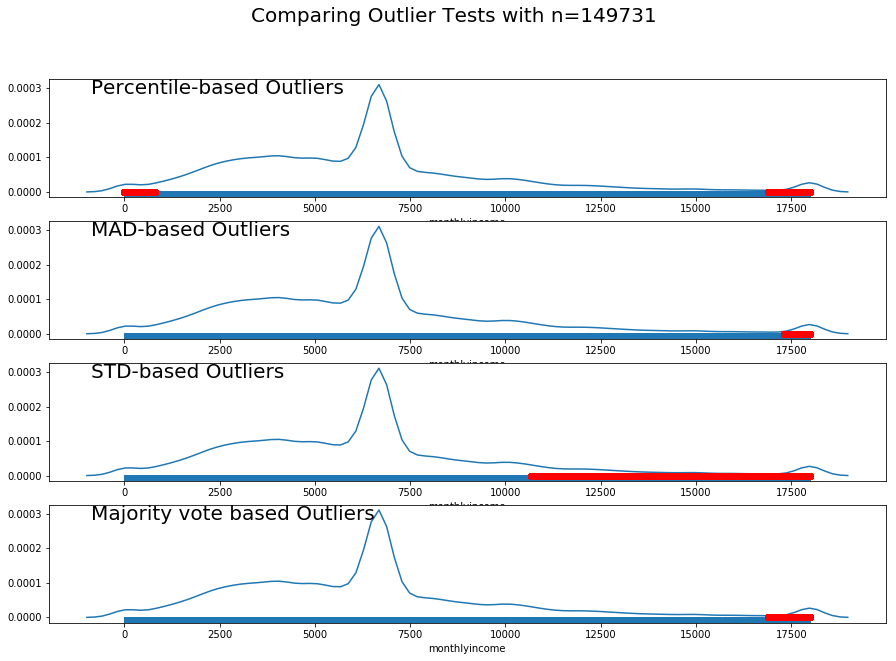

In [46]:
plotOutlier(df1.monthlyincome)

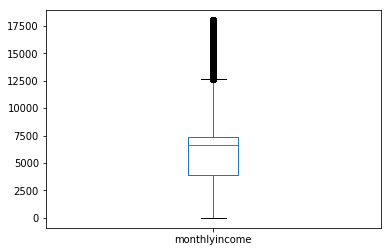

In [47]:
df1.monthlyincome.plot.box()

## numberofopencreditlinesandloans and numberrealestateloansorlines

Here I will do something different. 

After a lot of debate with myself. I couldn't conclude if I should do replacement on this variable or not. 

To test my theory. 

I split the data into 2 more datasets:  __df3 & df4__ 


df1 = mean replaced

df2 = median replaced

df3 = __mean__ replaced with __outlier removal__ from numberofopencreditlinesandloans & numberrealestateloansorlines variables

df4 = __median__ replaced with __outlier removal__ from numberofopencreditlinesandloans & numberrealestateloansorlines variables


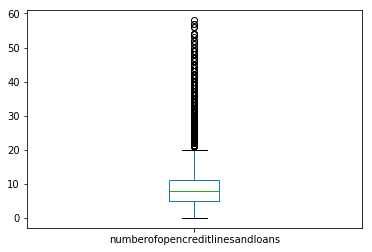

In [48]:
df1.numberofopencreditlinesandloans.plot.box()

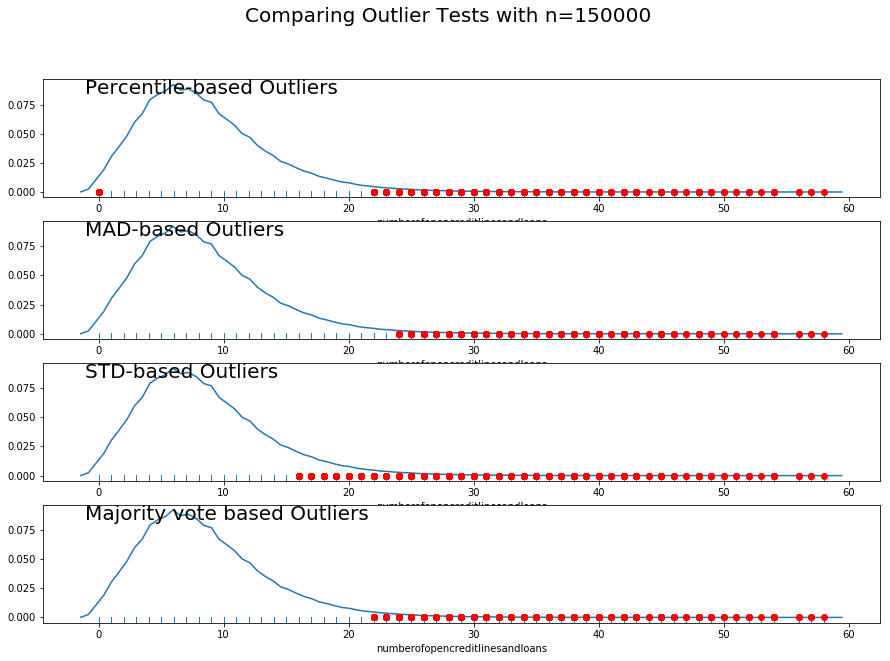

In [49]:
plotOutlier(df.numberofopencreditlinesandloans)

In [65]:
outlierRatio(df.numberofopencreditlinesandloans)

{'percentile_based_outlier': [5004, '3.34%'],
 'mad_based_outlier': [1898, '1.27%'],
 'std_div': [13826, '9.22%'],
 'outlierVote': [3116, '2.08%']}

In [66]:
df3 = df1.copy(deep = True)  # creating 2 more dataframes to test amputation difference (mean replaced)
df4 = df2.copy(deep = True)  # (median replaced)


In [67]:
min_bound  = min([val for (val, out) in zip(df.numberofopencreditlinesandloans, outlierVote(df.numberofopencreditlinesandloans)) if out == True])
min_bound

22

In [68]:
replace = []
for value in df3.numberofopencreditlinesandloans:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df3.numberofopencreditlinesandloans = replace

replace = []
for value in df4.numberofopencreditlinesandloans:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df4.numberofopencreditlinesandloans = replace




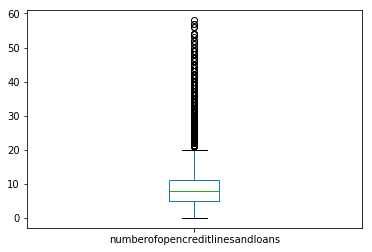

In [70]:
df1.numberofopencreditlinesandloans.plot.box()

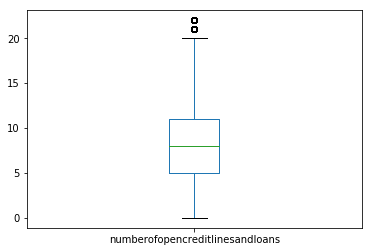

In [71]:
df3.numberofopencreditlinesandloans.plot.box()

## numberrealestateloansorlines


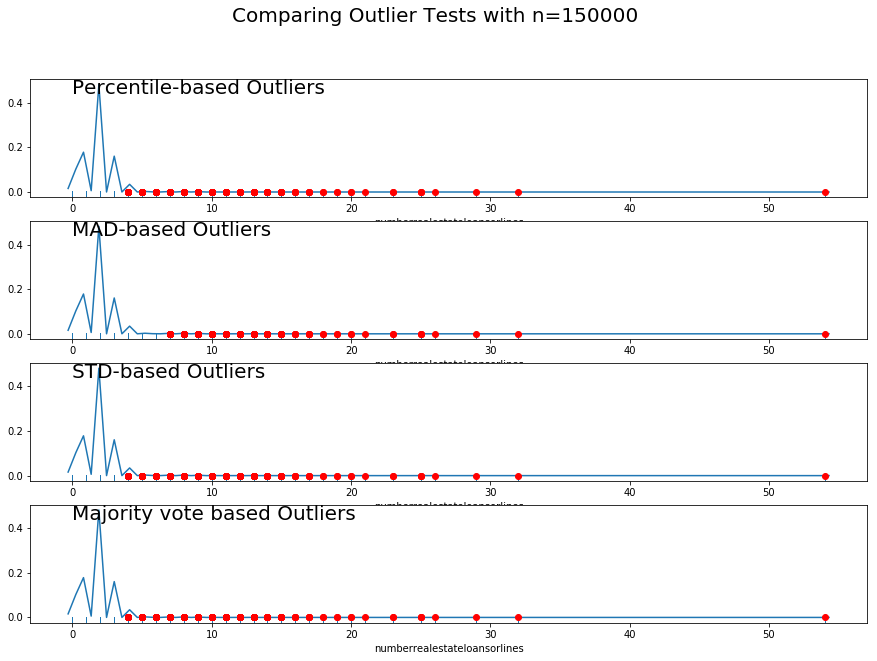

In [73]:
plotOutlier(df.numberrealestateloansorlines)

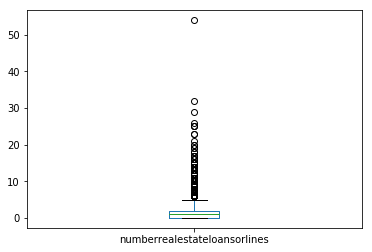

In [78]:
df.numberrealestateloansorlines.plot.box()

In [75]:
outlierRatio(df.numberrealestateloansorlines)

{'percentile_based_outlier': [3652, '2.43%'],
 'mad_based_outlier': [473, '0.32%'],
 'std_div': [3652, '2.43%'],
 'outlierVote': [3651, '2.43%']}

In [76]:
min_bound  = min([val for (val, out) in zip(df.numberrealestateloansorlines, outlierVote(df.numberrealestateloansorlines)) if out == True])


In [77]:
replace = []
for value in df3.numberrealestateloansorlines:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df3.numberrealestateloansorlines = replace

replace = []
for value in df4.numberrealestateloansorlines:
    if value > min_bound:
        replace.append(min_bound)
    else:
        replace.append(value)
df4.numberrealestateloansorlines = replace

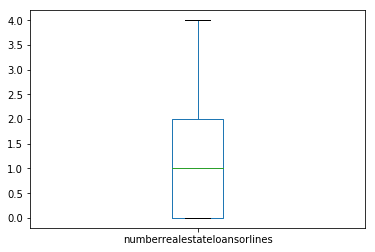

In [82]:
df3.numberrealestateloansorlines.plot.box()

# Baseline model:

Now that all the pre-processing & data cleaning is done. We will try to develop a baseline model. 

My plan of action is:

1. Split the dataframes into 4 different training set. 

2. Use cross validation dictionary functions to compare different model for 4 different datasets.  ROC score will be our accuracy metric.

3. Use the top two performing models for a given dataset

4. Use hyperparameter tuning using random search parameter tuning 

5. Develop a voting ensemble model to get best results


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [84]:
X1 = df1.drop('seriousdlqin2yrs', axis=1) # mean replaced
y1 = df1.seriousdlqin2yrs


X2 = df2.drop('seriousdlqin2yrs', axis=1) # median replaced
y2 = df2.seriousdlqin2yrs


X3 = df3.drop('seriousdlqin2yrs', axis=1) # mean replaced with outlier removal from numberofopencreditlinesandloans & numberrealestateloansorlines variables
y3 = df3.seriousdlqin2yrs


X4 = df4.drop('seriousdlqin2yrs', axis=1) # median replaced with outlier removal from numberofopencreditlinesandloans & numberrealestateloansorlines variables
y4 = df4.seriousdlqin2yrs

We define a function called cvDictGen. This function takes a list of different models, the user inputs scr which is an accuracy metric. It takes cv which are the number of folds as 5. 
The output is a dictionary that lists the scores for the scr accuracy metric. We will use this function to choose our top 2 models

In [86]:
from sklearn.model_selection import cross_val_score

def cvDictGen(functions, scr, X_train, y_train, cv=5, verbose=1): # basically input a bunch of models to compare for a accuracy metric. 
    
    """This function takes a list of functions & performs cross validation using 5 folds & compares scr as comparison metric"""
    cvDict = {}
    for func in functions:
        cvScore = cross_val_score(func, X_train, y_train, cv=cv, verbose=verbose, scoring=scr)
        cvDict[str(func).split('(')[0]] = [cvScore.mean(), cvScore.std()]
    
    return cvDict # outputs a dictionary of different functions comparing for accuracy metric 

def cvDictNormalize(cvDict):
    cvDictNormalized = {}
    for key in cvDict.keys():
        for i in cvDict[key]:
            cvDictNormalized[key] = ['{:0.2f}'.format((cvDict[key][0]/cvDict[cvDict.keys()[0]][0])),
                                     '{:0.2f}'.format((cvDict[key][1]/cvDict[cvDict.keys()[0]][1]))]
    return cvDictNormalized

## Parameter explanation for different models: 

### KNN:

__K= 5__ means our prediction is based on the five nearest neighbors. Here, n_neighbors=5.

__Weights are selected uniformly__, which means all the points in each neighborhood are weighted equally. Here, weights='uniform'.

__algorithm='auto'__: This parameter will try to decide the most appropriate algorithm based on the values we passed.

__leaf_size = 30__: This parameter affects the speed of the construction of the model and query. Here, we have used the default value, which is 30.

__p=2__: This indicates the power parameter for the Minkowski metric. Here, __p=2 uses euclidean_distance.__

__metric='minkowski'__: This is the default distance metric, which helps us build the tree.

__metric_params=None__: This is the default value that we are using.

### Logistic Regression: 

__penalty='l1'__ This parameter indicates the choice of the gradient descent algorithm. Here, we have selected the Newton-Conjugate_Gradient method.

__dual=False:__ If we have number of sample > number of features, then we should set this parameter as false.

__tol=0.0001:__ This is one of the stopping criteria for the algorithm.

__c=1.0:__ This value indicates the inverse of the regularization strength. This parameter must be a positive float value.

__fit_intercept = True:__ This is a default value for this algorithm. This parameter is used to indicate the bias for the algorithm.

__solver='liblinear':__ This algorithm performs well for small datasets, so we chose that.

__intercept_scaling=1:__ If we select the liblinear algorithm and fit_intercept = True, then this parameter helps us generate the feature weight.

__class_weight=None:__ There is no weight associated with the class labels.

__random_state=None:__ Here, we use the default value of this parameter.

__max_iter=100:__ Here, we iterate 100 times in order to converge our ML algorithm on the given dataset.

__multi_class='ovr':__ This parameter indicates that the given problem is the binary classification problem.

__verbose=2:__ If we use the liblinear in the solver parameter, then we need to put in a positive number for verbosity.



### AdaBoost

__base_estimator = None:__ The base estimator from which the boosted ensemble is built.

__n_estimators=200:__ The maximum number of estimators at which boosting is terminated. After 200 iterations, the algorithm will be terminated.

__learning_rate=1.0:__ This rate decides how fast our model will converge.



### Gradient Boosting 

__loss='deviance':__ This means that we are using logistic regression for classification with probabilistic output.

__learning_rate = 0.1:__ This parameter tells us how fast the model needs to converge.

__n_estimators = 200:__ This parameter indicates the number of boosting stages that are needed to be performed.

__subsample = 1.0:__ This parameter helps tune the value for bias and variance. Choosing subsample < 1.0 leads to a reduction in variance and an increase in bias.

__min_sample_split=2:__ The minimum number of samples required to split an internal node.

__min_weight_fraction_leaf=0.0:__ Samples have equal weight, so we have provided the value 0.

__max_depth=3:__ This indicates the maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree.

__init=None:__ For this parameter, loss.init_estimator is used for the initial prediction.

__random_state=None:__ This parameter indicates that the random state is generated using the numpy.random function.

__max_features=None:__ This parameter indicates that we have N number of features. So, max_features=n_features.

__verbose=0:__ No progress has been printed.




### Random Forest


__n_estimators=10:__ This indicates the number of trees in the forest.

__criterion='gini':__ Information gained will be calculated by gini.

__max_depth=None:__ This parameter indicates that nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

__min_samples_split=2:__ This parameter indicates that there is a minimum of two samples required to perform splitting in order to generate the tree.

__min_samples_leaf=1:__ This indicates the sample size of the leaf node.

__min_weight_fraction_leaf=0.0:__ This parameter indicates the minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Here, weight is equally distributed, so a sample weight is zero.

__max_features='auto':__ This parameter is considered using the auto strategy. We select the auto value, and then we select max_features=sqrt(n_features).

__max_leaf_nodes=None:__ This parameter indicates that there can be an unlimited number of leaf nodes.

__bootstrap=True:__ This parameter indicates that the bootstrap samples are used when trees are being built.

__oob_score=False:__ This parameter indicates whether to use out-of-the-bag samples to estimate the generalization accuracy. We are not considering out-of-the-bag samples here.

__n_jobs=1:__ Both fit and predict job can be run in parallel if n_job = 1.

__random_state=None:__ This parameter indicates that random state is generated using the numpy.random function.

__verbose=0_:__ This controls the verbosity of the tree building process. 0 means we are not printing the progress.


In [87]:
# Define the models with above parameters: 
    
# K-Nearest Neighbor (KNN)
    
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', 
                             metric_params=None)

# Logistic Regression

glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)


# AdaBoost

adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

## GradientBoosting 

gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

#  RandomForest
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)




We defined some classification models that I found fit for the job! 

Then I used cvDict function to pass these models to the function. We pass roc_auc as our accuracy metric. 
We use all 4 datasets to compare the different results. 

In [95]:
cvd1 = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], X_train = X1, y_train= y1, scr='roc_auc')
cvd1

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.2s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.6min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.4s finished


{'KNeighborsClassifier': [0.5929775351111646, 0.002353986078095649],
 'LogisticRegression': [0.8494983809406289, 0.0031453985914983718],
 'AdaBoostClassifier': [0.8577729981894237, 0.0016987704755795933],
 'GradientBoostingClassifier': [0.863485037708981, 0.0027346661875831133],
 'RandomForestClassifier': [0.7765591496473276, 0.00485487461804188]}

In [90]:
cvd2 = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], X_train = X2, y_train= y2, scr='roc_auc')
cvd2

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.5s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.8min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s finished


{'KNeighborsClassifier': [0.5928967231000382, 0.0027936265271232955],
 'LogisticRegression': [0.8493841387804852, 0.003747929440053093],
 'AdaBoostClassifier': [0.8579923642384883, 0.0017667863266078816],
 'GradientBoostingClassifier': [0.8632219810574971, 0.0027148244329676186],
 'RandomForestClassifier': [0.778398284933113, 0.004074682788788017]}

In [91]:
cvd3 = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], X_train = X3, y_train= y3, scr='roc_auc')
cvd3

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.7s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.1s finished


{'KNeighborsClassifier': [0.5918827016126205, 0.0019534840287111477],
 'LogisticRegression': [0.8491817448431338, 0.0034578596979079083],
 'AdaBoostClassifier': [0.8578928838075622, 0.0017424384243386127],
 'GradientBoostingClassifier': [0.8633686850709307, 0.002598612663871558],
 'RandomForestClassifier': [0.7792190445785719, 0.003613481588105786]}

In [106]:
cvd4 = cvDictGen(functions=[knMod, glmMod, adaMod, gbMod, rfMod], X_train = X4, y_train= y4, scr='roc_auc')
cvd4

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.6s finished


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.6s finished


{'KNeighborsClassifier': [0.5919699754483811, 0.0025532300893441376],
 'LogisticRegression': [0.8491330878477157, 0.0033685937384067078],
 'AdaBoostClassifier': [0.8581513627965751, 0.001734683347518412],
 'GradientBoostingClassifier': [0.8633246462928066, 0.0024988981315673584],
 'RandomForestClassifier': [0.7788921898767592, 0.002921498455501299]}

As we can see the results are pretty similar for different models for different datasets. Using mean replaced or median replaced with our without variable amputations yields similar results. 

Upon careful consideration, I will use cvd4 : X4, y4 as our data from here onwards. You can use any of the data the results will be very close. 

__Conclusion:  All the outlier & amputation techniques performed very closely for roc score metric. We can use any one of them.
The top two algorithms are AdaBoostClassifier & GradientBoostingClassifier as they yield the highest score.__



# Hyperparameter Tuning

We will try to improve these two models even further. Let's see how far can we improve our roc_score 

We will use randomizedSearchCV as it is computationally less expensive. We will use dataset 4 which is df4  

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [103]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.25)


In [104]:
# adaboost

adaHyperParams = {'n_estimators': [10,50,100,200,420]}

gridSearchAda = RandomizedSearchCV(estimator=adaMod, param_distributions=adaHyperParams, n_iter=5,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train4, y_train4)


gridSearchAda.best_params_, gridSearchAda.best_score_

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.6s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   0.6s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   0.5s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=50 .................................................
[CV] .................................. n_estimators=50, total=   3.0s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=   6.1s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.9min finished


({'n_estimators': 100}, 0.8587942279895682)

#### Our best parameters method gives :  n_estimators = 100 for a 0.8588 roc score, previously our score was 0.8582 which is a slight improvement

In [105]:
gbHyperParams = {'loss' : ['deviance', 'exponential'],
                 'n_estimators': randint(10, 500),
                 'max_depth': randint(1,10)}


gridSearchGB = RandomizedSearchCV(estimator=gbMod, param_distributions=gbHyperParams, n_iter=10,
                                   scoring='roc_auc', fit_params=None, cv=None, verbose=2).fit(X_train4, y_train4)


gridSearchGB.best_params_, gridSearchGB.best_score_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] loss=deviance, max_depth=6, n_estimators=447 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=447, total=  57.5s
[CV] loss=deviance, max_depth=6, n_estimators=447 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.3s remaining:    0.0s


[CV] ..... loss=deviance, max_depth=6, n_estimators=447, total=  58.3s
[CV] loss=deviance, max_depth=6, n_estimators=447 ....................
[CV] ..... loss=deviance, max_depth=6, n_estimators=447, total=  57.2s
[CV] loss=exponential, max_depth=4, n_estimators=397 .................
[CV] .. loss=exponential, max_depth=4, n_estimators=397, total=  31.3s
[CV] loss=exponential, max_depth=4, n_estimators=397 .................
[CV] .. loss=exponential, max_depth=4, n_estimators=397, total=  31.1s
[CV] loss=exponential, max_depth=4, n_estimators=397 .................
[CV] .. loss=exponential, max_depth=4, n_estimators=397, total=  32.5s
[CV] loss=deviance, max_depth=1, n_estimators=253 ....................
[CV] ..... loss=deviance, max_depth=1, n_estimators=253, total=   4.6s
[CV] loss=deviance, max_depth=1, n_estimators=253 ....................
[CV] ..... loss=deviance, max_depth=1, n_estimators=253, total=   4.6s
[CV] loss=deviance, max_depth=1, n_estimators=253 ....................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 24.2min finished


({'loss': 'deviance', 'max_depth': 3, 'n_estimators': 142}, 0.8626000814329919)

## Retrain the model with best parameters: 

In [108]:
### FIT THE MODEL WITH BEST PARAMETERS


bestGbModFitted = gridSearchGB.best_estimator_.fit(X_train4, y_train4)

bestAdaModFitted = gridSearchAda.best_estimator_.fit(X_train4, y_train4)

cvd_best_parameters = cvDictGen(functions=[bestGbModFitted, bestAdaModFitted], X_train = X4, y_train= y4, scr='roc_auc')


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.5s finished


## Voting based ensemble model

In [110]:
from sklearn.ensemble import VotingClassifier

votingMod = VotingClassifier(estimators=[('gb', bestGbModFitted), ('ada', bestAdaModFitted)], 
                                 voting='soft',weights=[2,1])
votingMod = votingMod.fit(X_train4, y_train4)

test_labels=votingMod.predict_proba(np.array(X_test4.values))[:,1]
roc_auc_score(y_test4,test_labels , average='macro', sample_weight=None)

0.8631124025465287

# Conclusion:

In this notebook we took a kaggle dataset. We did the following: 


1. Applied some basic EDA
2. Applied extensive outlier removal
3. Performed intial base line modelling for classification
4. Improved the model with Hyperparameter tuning
5. Applied a simple ensemble based voting method for predicting 

Our final roc score for the dataset was 0.86 which is considered good for real time applications. 

Thank you! 